<a href="https://colab.research.google.com/github/AndreNasci/ECO904/blob/main/Andre_Augusto_Cesar_do_Nascimento_ECO904_06_N%C3%A3o_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade

Realize os sequintes procedimentos:
- Escolha uma base de dados abaixo
- Realize todos os procedimentos de análise e correção da base de dados
- Faça o agrupamento dos dados de entrada
- Compare com as métricas de avaliação de agrupamento
- Repita o procedimeto após decomposição da base de dados

In [1]:
# http://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv'

## Analisando a base de dados

In [2]:
import pandas as pd
reviewsDS = pd.read_csv(url, sep=';', decimal=',')
reviewsDS.head(5)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3.0,3773,North America,7,March,Tuesday


In [3]:
reviewsDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User country       504 non-null    object 
 1   Nr. reviews        504 non-null    int64  
 2   Nr. hotel reviews  504 non-null    int64  
 3   Helpful votes      504 non-null    int64  
 4   Score              504 non-null    int64  
 5   Period of stay     504 non-null    object 
 6   Traveler type      504 non-null    object 
 7   Pool               504 non-null    object 
 8   Gym                504 non-null    object 
 9   Tennis court       504 non-null    object 
 10  Spa                504 non-null    object 
 11  Casino             504 non-null    object 
 12  Free internet      504 non-null    object 
 13  Hotel name         504 non-null    object 
 14  Hotel stars        504 non-null    float64
 15  Nr. rooms          504 non-null    int64  
 16  User continent     504 non

In [4]:
reviewsDS.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.142857,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,0.774487,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.500000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


## Correção da base de dados

### User country

In [5]:
# Analisando os valores diferentes que o atributo possui
reviewsDS['User country'].unique()

array(['USA', 'UK', 'Canada', 'India', 'Australia', 'New Zeland',
       'Ireland', 'Egypt', 'Finland', 'Kenya', 'Jordan', 'Netherlands',
       'Syria', 'Scotland', 'South Africa', 'Swiss',
       'United Arab Emirates', 'Hungary', 'China', 'Greece', 'Mexico',
       'Croatia', 'Germany', 'Malaysia', 'Thailand', 'Phillippines',
       'Israel', 'India ', 'Belgium', 'Puerto Rico', 'Switzerland',
       'Norway', 'France', 'Spain', 'Singapore', 'Brazil', 'Costa Rica',
       'Iran', 'Saudi Arabia', 'Honduras', 'Denmark', 'Taiwan', 'Hawaii',
       'Kuwait', 'Czech Republic', 'Japan', 'Korea', 'Italy'],
      dtype=object)

In [6]:
y, countries = pd.factorize(reviewsDS['User country'])
y, countries

(array([ 0,  0,  0,  1,  2,  2,  1,  0,  3,  2,  0,  4,  0,  0,  1,  5,  2,
         0,  2,  0,  1,  5,  1,  0,  6,  0,  2,  1,  0,  6,  2,  4,  2,  7,
         4,  8,  0,  9,  0,  0, 10,  2, 11,  6,  0,  1,  1, 12,  1,  0,  0,
         0,  2,  0, 13, 14,  4,  1,  6,  2,  1,  5, 15,  1, 16,  6,  0,  0,
        17, 18, 19, 20, 21,  4,  2,  0,  0,  2,  0,  4,  3, 22,  0,  2,  4,
        23, 20,  1,  1,  0,  4,  0, 24,  4,  2,  2,  1,  0, 25, 26,  2,  1,
         6, 27,  5, 28,  1,  4,  1,  1,  5,  4,  2,  4,  1,  0,  3, 11,  1,
         1,  0,  0, 29,  2,  0,  0,  2,  0,  1,  1,  0,  0,  0,  1,  1,  2,
         0,  0,  0,  0,  4,  4,  0,  0,  4,  4, 30,  1,  0,  0,  6,  0, 22,
         0, 22,  6,  0,  4,  2,  0,  1, 31,  0,  1,  7,  0,  2,  0, 20,  0,
         2,  0,  2,  2,  0,  2, 32,  1,  0,  0, 33,  0,  1,  0,  1,  0,  2,
         4, 34, 35,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0, 34,  1,  0,  0,
         0,  2,  2,  8,  2,  2,  0,  1, 36,  1,  1,  0,  1,  3,  0,  0,  0,
         0, 

In [7]:
reviewsDS['User country'] = reviewsDS['User country'].factorize()[0]

In [8]:
# Checando correlação entre index e nomes
reviewsDS['User country'][11], countries[4]

(4, 'Australia')

### Traveler type, Hotel name, User continent


In [9]:
reviewsDS['Traveler type'], traveler_type = pd.factorize(reviewsDS['Traveler type'])
traveler_type

Index(['Friends', 'Business', 'Families', 'Solo', 'Couples'], dtype='object')

In [10]:
reviewsDS['Hotel name'], hotel_names = pd.factorize(reviewsDS['Hotel name'])
hotel_names

Index(['Circus Circus Hotel & Casino Las Vegas', 'Excalibur Hotel & Casino',
       'Monte Carlo Resort&Casino', 'Treasure Island- TI Hotel & Casino',
       'Tropicana Las Vegas - A Double Tree by Hilton Hotel', 'Caesars Palace',
       'The Cosmopolitan Las Vegas', 'The Palazzo Resort Hotel Casino',
       'Wynn Las Vegas', 'Trump International Hotel Las Vegas', 'The Cromwell',
       'Encore at wynn Las Vegas', 'Hilton Grand Vacations on the Boulevard',
       'Marriott's Grand Chateau', 'Tuscany Las Vegas Suites & Casino',
       'Hilton Grand Vacations at the Flamingo', 'Wyndham Grand Desert',
       'The Venetian Las Vegas Hotel', 'Bellagio Las Vegas', 'Paris Las Vegas',
       'The Westin las Vegas Hotel Casino & Spa'],
      dtype='object')

In [11]:
reviewsDS['User continent'], continents = pd.factorize(reviewsDS['User continent'])
continents

Index(['North America', 'Europe', 'Asia', 'Oceania', 'Africa',
       'South America'],
      dtype='object')

### Pool, Gym, Tennis court, Spa, Casino, Free internet

In [12]:
dicionario = {'NO': 0, 'YES': 1}
reviewsDS['Pool'] = reviewsDS['Pool'].apply(lambda x: dicionario[x]).values
reviewsDS['Tennis court'] = reviewsDS['Tennis court'].apply(lambda x: dicionario[x]).values
reviewsDS['Spa'] = reviewsDS['Spa'].apply(lambda x: dicionario[x]).values
reviewsDS['Casino'] = reviewsDS['Casino'].apply(lambda x: dicionario[x]).values
reviewsDS['Gym'] = reviewsDS['Gym'].apply(lambda x: dicionario[x]).values
reviewsDS['Free internet'] = reviewsDS['Free internet'].apply(lambda x: dicionario[x]).values

In [13]:
# reviewsDS['Pool'], has_pool = pd.factorize(reviewsDS['Pool'])
# reviewsDS['Tennis court'], has_tennisCourt = pd.factorize(reviewsDS['Tennis court'])
# reviewsDS['Spa'], has_spa = pd.factorize(reviewsDS['Spa'])
# reviewsDS['Casino'], has_casino = pd.factorize(reviewsDS['Casino'])
# reviewsDS['Gym'], has_gym = pd.factorize(reviewsDS['Gym'])
# reviewsDS['Free internet'], has_freeInternet = pd.factorize(reviewsDS['Free internet'])

In [14]:
# has_pool, has_tennisCourt, has_spa, has_casino, has_gym, has_freeInternet

### Hotel stars

In [15]:
# Só é possível fazer essa conversão graças ao parâmetro (decimal='.')
# na importação do arquivo csv
reviewsDS['Hotel stars'] = reviewsDS['Hotel stars'].astype(float)

In [16]:
reviewsDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User country       504 non-null    int64  
 1   Nr. reviews        504 non-null    int64  
 2   Nr. hotel reviews  504 non-null    int64  
 3   Helpful votes      504 non-null    int64  
 4   Score              504 non-null    int64  
 5   Period of stay     504 non-null    object 
 6   Traveler type      504 non-null    int64  
 7   Pool               504 non-null    int64  
 8   Gym                504 non-null    int64  
 9   Tennis court       504 non-null    int64  
 10  Spa                504 non-null    int64  
 11  Casino             504 non-null    int64  
 12  Free internet      504 non-null    int64  
 13  Hotel name         504 non-null    int64  
 14  Hotel stars        504 non-null    float64
 15  Nr. rooms          504 non-null    int64  
 16  User continent     504 non

### Review month, Review weekday

In [17]:
reviewsDS['Review month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [18]:
dicionario_mes = {
    'January': 1, 'February': 1, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
    'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

reviewsDS['Review month'] = reviewsDS['Review month'].apply(lambda x: dicionario_mes[x]).values

In [19]:
reviewsDS['Review weekday'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Sunday',
       'Monday'], dtype=object)

In [20]:
dicionario_semana = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

reviewsDS['Review weekday'] = reviewsDS['Review weekday'].apply(lambda x: dicionario_semana[x]).values

### Period of stay

In [21]:
periods = reviewsDS['Period of stay'].unique()
periods

array(['Dec-Feb', 'Mar-May', 'Jun-Aug', 'Sep-Nov'], dtype=object)

In [22]:
dicionario_periodo = {'Dec-Feb': 0, 'Mar-May': 1, 'Jun-Aug': 2, 'Sep-Nov': 3}

reviewsDS['Period of stay'] = reviewsDS['Period of stay'].apply(lambda x: dicionario_periodo[x]).values

In [23]:
reviewsDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User country       504 non-null    int64  
 1   Nr. reviews        504 non-null    int64  
 2   Nr. hotel reviews  504 non-null    int64  
 3   Helpful votes      504 non-null    int64  
 4   Score              504 non-null    int64  
 5   Period of stay     504 non-null    int64  
 6   Traveler type      504 non-null    int64  
 7   Pool               504 non-null    int64  
 8   Gym                504 non-null    int64  
 9   Tennis court       504 non-null    int64  
 10  Spa                504 non-null    int64  
 11  Casino             504 non-null    int64  
 12  Free internet      504 non-null    int64  
 13  Hotel name         504 non-null    int64  
 14  Hotel stars        504 non-null    float64
 15  Nr. rooms          504 non-null    int64  
 16  User continent     504 non

## Decomposição dos dados

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarn

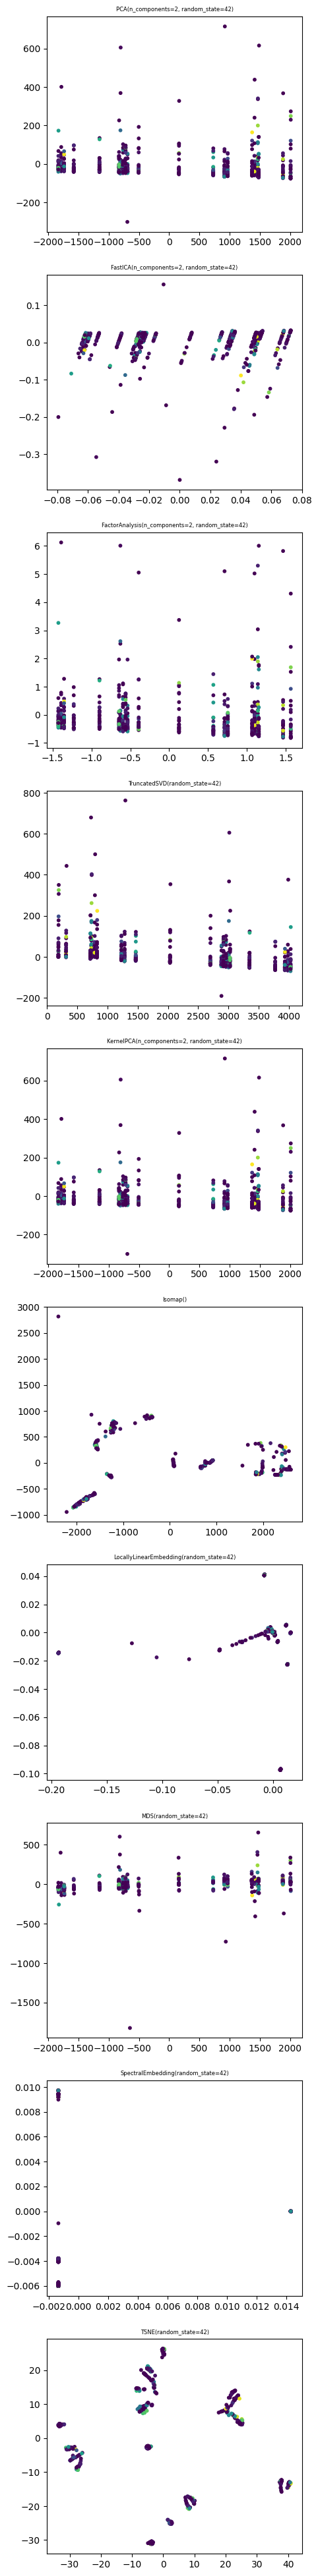

In [28]:
from sklearn import decomposition, manifold
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# algumas técnicas de decomposição
decomp = [
    decomposition.PCA(n_components=2,random_state=42),
    decomposition.FastICA(n_components=2,random_state=42),
    decomposition.FactorAnalysis(n_components=2,random_state=42),
    #decomposition.LatentDirichletAllocation(n_components=2,random_state=42),
    decomposition.TruncatedSVD(n_components=2,random_state=42),
    decomposition.KernelPCA(n_components=2,random_state=42),
    #decomposition.NMF(n_components=2,random_state=42),
    # daqui pra baixo, o n_components default é 2
    manifold.Isomap(),
    manifold.LocallyLinearEmbedding(random_state=42),
    manifold.MDS(random_state=42),
    manifold.SpectralEmbedding(random_state=42),
    manifold.TSNE(random_state=42),
]

# agrup: fit e predict ou fit_predict()
# decomp: fit e transform ou fit_transform()

plt.figure(figsize=(5, 5 * len(decomp)))
plt.subplots_adjust()

datasets = []
for id, dc in enumerate(tqdm(decomp)):
  
  Xd = dc.fit_transform(reviewsDS)

  datasets.append((Xd,{'n_clusters':2},str(dc)))
      
  plt.subplot(len(decomp), 1, id+1)
  plt.title(str(dc), size=6)

  plt.scatter(Xd[:, 0], Xd[:, 1], s=10, c=y)

plt.show()

In [30]:
datasets

[(array([[-1.57695117e+03, -2.67754981e+01],
         [-1.57582215e+03,  9.62641473e+01],
         [-1.57670502e+03, -8.39062069e-02],
         ...,
         [ 1.37120164e+03,  7.70133742e+01],
         [ 1.36990997e+03, -5.92471752e+01],
         [ 1.37042597e+03,  4.67655409e+00]]),
  {'n_clusters': 2},
  'PCA(n_components=2, random_state=42)'),
 (array([[-0.05330214,  0.01845946],
         [-0.05872919, -0.04469628],
         [-0.05447941,  0.00475878],
         ...,
         [ 0.04396062, -0.04362961],
         [ 0.04996939,  0.02631249],
         [ 0.0471474 , -0.00649908]]),
  {'n_clusters': 2},
  'FastICA(n_components=2, random_state=42)'),
 (array([[-1.22770394, -0.28167526],
         [-1.22770267,  0.98257438],
         [-1.22770372, -0.01941134],
         ...,
         [ 1.06710738,  0.14092321],
         [ 1.06710623, -0.66976454],
         [ 1.067108  ,  1.00407103]]),
  {'n_clusters': 2},
  'FactorAnalysis(n_components=2, random_state=42)'),
 (array([[ 3.77266472e+03, -5.0

In [29]:

from sklearn import cluster, mixture, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
import time
import warnings

# https://scikit-learn.org/stable/modules/clustering.html

metricas = []

plot_num = 1
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01)

for i, (dados, config, nome) in enumerate(tqdm(datasets)):

  X, y_true = dados

  agrupadores = [
      cluster.KMeans(n_clusters=config['n_clusters'], random_state=42),
      cluster.MeanShift(), # define o numero de cluster sozinho, em geral, de acordo com a densidade dos dados no espaço
      cluster.MiniBatchKMeans(n_clusters=config['n_clusters'], random_state=42), # kmeans otimizado para rodar em grupos grandes
      cluster.AgglomerativeClustering(n_clusters=config['n_clusters'], linkage='ward'), # se diferencia do kmeans 
      # pela forma como calcula distãncia entre os pontos
      cluster.SpectralClustering(n_clusters=config['n_clusters'], eigen_solver='arpack', affinity='nearest_neighbors', random_state=42),
      cluster.DBSCAN(),
      cluster.OPTICS(),
      cluster.AffinityPropagation(random_state=42),
      cluster.AgglomerativeClustering(n_clusters=config['n_clusters'], linkage='average', metric='cityblock'),
      cluster.Birch(n_clusters=config['n_clusters']),
      mixture.GaussianMixture(n_components=config['n_clusters'], covariance_type='full'), # não faz parte da biblioteca de 
      # clusterizador do kmeans, mas da biblioteca de mistura (mixture)
  ]

  for ag in tqdm(agrupadores):

    warnings.filterwarnings('ignore')

    t0 = time.time()
    ag.fit(X)
    t1 = time.time() # gambiarra pra saber o tempo de treinamento

    warnings.filterwarnings('default')

    if hasattr(ag, "labels_"): # tem técnicas que retornam automaticamente as labels dos dados
      y_pred = ag.labels_.astype(int)
    else: # tem outras que, para isso, precisamos usar o predict
      y_pred = ag.predict(X)

    if len(set(y_pred)) > 1: # se ele encontra mais de um cluster, há mais métricas
    # disponíveis para serem exploradas

      metricas.append({
        'dataset':nome,
        'algorithm':str(ag),
        'time':t1-t0,
        'mutualInfo(MI)':metrics.mutual_info_score(y_true,y_pred),
        'adjustedMI':metrics.adjusted_mutual_info_score(y_true,y_pred),
        'normalizedMI':metrics.normalized_mutual_info_score(y_true,y_pred),
        'rand(R)':metrics.rand_score(y_true,y_pred),
        'adjustedR':metrics.adjusted_rand_score(y_true,y_pred),
        'completeness':metrics.completeness_score(y_true,y_pred),
        'fowlkesMallows':metrics.fowlkes_mallows_score(y_true,y_pred),
        'homogeneity':metrics.homogeneity_score(y_true,y_pred),
        'vMeasure':metrics.v_measure_score(y_true,y_pred),
        'calinskiHarabasz':metrics.calinski_harabasz_score(X,y_pred),
        'daviesBouldin':metrics.davies_bouldin_score(X,y_pred),
        'silhouette':metrics.silhouette_score(X,y_pred),
      })

    else: # caso contrário, somente estas:
      # esta técnica só gerou um grupo (cluster)
      metricas.append({
        'dataset':nome,
        'algorithm':str(ag),
        'time':t1-t0,
      })

    plt.subplot(len(datasets), len(agrupadores), plot_num)
    if i == 0:
      plt.title(str(ag), size=6)

    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    plot_num += 1

plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

ValueError: ignored

<Figure size 2100x1300 with 0 Axes>